In [2]:
import pandas as pd
import seaborn as sns
from sklearn import tree 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer,f1_score,recall_score,precision_score

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [3]:
a=load_iris()
df=pd.DataFrame(a.data, columns=a.feature_names)
print(a.feature_names)
print("\n")
df['target']= a.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
df.shape

(150, 5)

<AxesSubplot:>

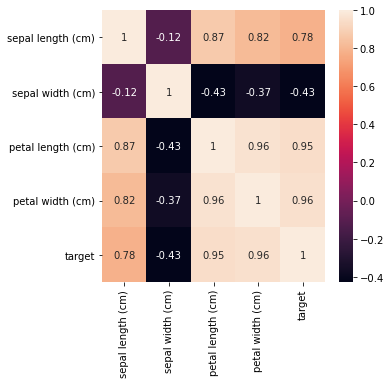

In [9]:
corr = df.corr()
plt.figure(figsize=(5,5)) 
sns.heatmap(corr, annot=True)

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(df[a.feature_names],df['target'])
print(len(X_train))
print(len(X_test))

112
38


In [11]:
DT=DecisionTreeClassifier(criterion="gini")

In [12]:
model=DT.fit(X_train,Y_train)
y_preds=model.predict(X_test)
print(y_preds)
print(a.feature_names)
print("\n")

[0 0 1 0 0 2 0 2 0 0 0 2 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 2 0 0 2 1 0 2 2 1 0
 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




[Text(452.0833333333333, 771.1785714285714, 'petal width (cm) <= 1.75\ngini = 0.662\nsamples = 112\nvalue = [31, 39, 42]\nclass = virginica'),
 Text(258.3333333333333, 652.5357142857142, 'petal width (cm) <= 0.8\ngini = 0.534\nsamples = 72\nvalue = [31, 38, 3]\nclass = versicolor'),
 Text(193.75, 533.8928571428571, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(322.91666666666663, 533.8928571428571, 'petal length (cm) <= 5.35\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]\nclass = versicolor'),
 Text(258.3333333333333, 415.25, 'sepal length (cm) <= 4.95\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]\nclass = versicolor'),
 Text(129.16666666666666, 296.6071428571429, 'sepal width (cm) <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(64.58333333333333, 177.96428571428578, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(193.75, 177.96428571428578, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virgini

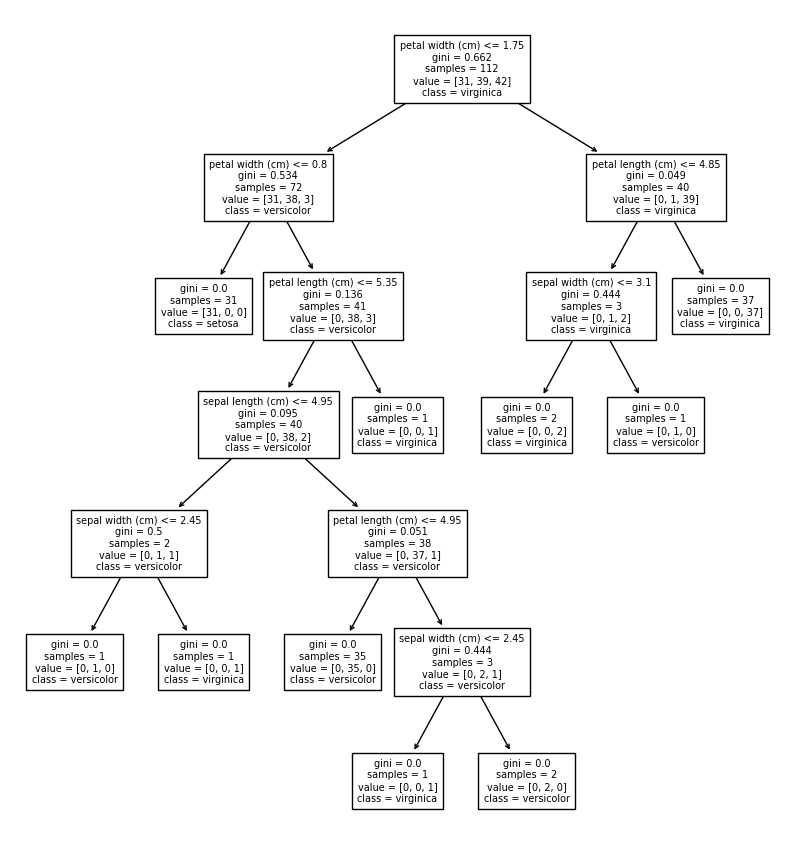

In [15]:
axes=plt.subplots(nrows=1,ncols=1,figsize=(10,11),dpi=100)
tree.plot_tree(DT,fontsize=7,feature_names=a.feature_names,class_names=a.target_names)